### Data Analysis of GDP by Country from 1960 to 2023

In [2]:
# Importing required libraries
import pandas as pd
from pathlib import Path
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from matplotlib.ticker import MaxNLocator


In [3]:
# opening and reading the file
filepath = open(r"C:\Users\Dataset\All Countries and Economies GDP 1960-2023.csv")
df = pd.read_csv(filepath)

In [4]:
#Made a copy of the dataframe
gdp_df = df.copy()

In [5]:
#Cleaned the header name
gdp_df.rename(columns={'ï»¿Country Name' : 'Country_Name'}, inplace=True)

In [6]:
#Dropped not useful columns
gdp_df.drop(columns = ['Country Code','Indicator Name','Indicator Code'], inplace = True, errors = 'ignore')

#Set the index as country names
new_gdp_df = gdp_df.set_index('Country_Name')


### What is the average GDP for each country?

In [7]:
#Filter actual countries in the DataFrame
countries = pd.read_csv(r"C:\Users\Dataset\countries of the world.csv")
countries_copy = countries.copy()
actual_countries = countries_copy['Country'].str.strip().tolist()
filtered_countries = new_gdp_df[new_gdp_df.index.isin(actual_countries)]
filtered_countries_copy = filtered_countries.copy()


In [8]:
# Check the GDP for specific country and the year
country_select = 'Zimbabwe'
year_select = '2023'
filtered_countries_copy.loc[filtered_countries_copy.index==country_select, year_select].iloc[0]

35231367886.0

In [14]:
#calculating stats for country as per GDP
Stats_df = filtered_countries_copy.T
stats_data = Stats_df.describe()
stats_data

Country_Name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Australia,...,Uganda,Ukraine,Uruguay,United States,Uzbekistan,Vanuatu,Samoa,South Africa,Zambia,Zimbabwe
count,3.800000e+01,2.400000e+01,4.400000e+01,4.400000e+01,5.400000e+01,5.400000e+01,6.200000e+01,3.400000e+01,2.100000e+01,6.400000e+01,...,6.400000e+01,3.700000e+01,6.400000e+01,6.400000e+01,3.700000e+01,4.500000e+01,5.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,2.077401e+09,1.326544e+10,4.080588e+10,7.343890e+09,1.700524e+09,1.598198e+11,2.264030e+11,7.403765e+09,6.161429e+08,5.221779e+11,...,1.081305e+10,1.021695e+11,2.119088e+10,8.550219e+12,3.732481e+10,4.387757e+08,3.704833e+08,1.696374e+11,8.326152e+09,9.593049e+09
std,9.153639e+08,6.333793e+09,4.166963e+10,6.105866e+09,1.349105e+09,1.602931e+11,1.945800e+11,5.848999e+09,9.567512e+07,5.435883e+11,...,1.332854e+10,5.245462e+10,2.238660e+10,7.455108e+12,3.054341e+10,3.121806e+08,3.089554e+08,1.444691e+11,9.195474e+09,9.914481e+09
min,4.055866e+08,2.813572e+09,4.438321e+09,6.521750e+08,7.861771e+07,6.859867e+08,1.827212e+10,1.201313e+09,4.930000e+08,1.860768e+10,...,4.231456e+08,3.158064e+10,1.242289e+09,5.420000e+11,8.523161e+09,1.137818e+08,4.520834e+07,8.748597e+09,6.792797e+08,1.052990e+09
25%,1.335475e+09,6.779633e+09,7.412969e+09,2.045566e+09,3.946246e+08,4.081899e+10,7.004844e+10,1.951140e+09,5.240000e+08,1.030761e+11,...,1.999666e+09,5.254955e+10,4.058731e+09,1.822500e+12,1.309993e+10,1.688792e+08,1.134448e+08,4.252748e+10,2.392004e+09,4.343293e+09
50%,2.307424e+09,1.517696e+10,1.325755e+10,4.135085e+09,1.210973e+09,7.462279e+10,1.530000e+11,7.516195e+09,6.380000e+08,3.175000e+11,...,4.790440e+09,8.923887e+10,1.162591e+10,6.340000e+12,1.707847e+10,2.720146e+08,2.526580e+08,1.320000e+11,3.598927e+09,6.621341e+09
75%,2.775100e+09,1.876495e+10,7.159601e+10,1.243393e+10,3.159600e+09,3.112500e+11,3.245000e+11,1.142596e+10,6.710000e+08,8.735000e+11,...,1.253702e+10,1.490000e+11,2.681932e+10,1.450000e+13,6.729364e+10,7.478397e+08,6.705322e+08,3.180000e+11,1.437480e+10,8.677065e+09
max,3.648573e+09,2.049713e+10,1.360000e+11,2.354718e+10,4.102319e+09,5.140000e+11,6.460000e+11,2.408575e+10,8.710000e+08,1.730000e+12,...,4.876896e+10,2.000000e+11,7.724083e+10,2.770000e+13,1.020000e+11,1.126313e+09,9.381894e+08,4.580000e+11,2.916378e+10,5.107466e+10


In [13]:
#To get the average,median,max,min gdps of the specific country
country_name = 'Canada'
Stats = 'mean'
stats_data.loc[Stats,country_name]

755446773153.4219

### Which country has the highest and lowest GDP?

In [11]:
stats_data_fill = stats_data.T
max_mean_country = stats_data_fill['mean'].idxmax()
max_mean_value = stats_data_fill['mean'].max()

min_mean_country = stats_data_fill['mean'].idxmin()
min_mean_value = stats_data_fill['mean'].min()

print(f"The country with the maximum mean GDP is: {max_mean_country}")
print(f"The maximum mean GDP value is: {max_mean_value}")

print(f"The country with the minimum mean GDP is: {min_mean_country}")
print(f"The minimum mean GDP value is: {min_mean_value}")


The country with the maximum mean GDP is: United States
The maximum mean GDP value is: 8550218750000.0
The country with the minimum mean GDP is: Tuvalu
The minimum mean GDP value is: 19937546.84051852


### What is the total global GDP (sum of GDPs of all countries) for each year?

In [15]:
# Limiting display of rows 
pd.set_option('display.max_rows', 100)

In [17]:
gdp_sum = filtered_countries_copy.sum()
gdp_sum

1960    1.228091e+12
1961    1.296880e+12
1962    1.417303e+12
1963    1.523485e+12
1964    1.673213e+12
1965    1.827881e+12
1966    1.979638e+12
1967    2.104211e+12
1968    2.276908e+12
1969    2.515512e+12
1970    2.767399e+12
1971    3.056663e+12
1972    3.536539e+12
1973    4.320266e+12
1974    4.958269e+12
1975    5.504147e+12
1976    5.960349e+12
1977    6.729821e+12
1978    7.992780e+12
1979    9.219765e+12
1980    1.045874e+13
1981    1.079693e+13
1982    1.063525e+13
1983    1.082320e+13
1984    1.125513e+13
1985    1.177198e+13
1986    1.390577e+13
1987    1.604570e+13
1988    1.795516e+13
1989    1.878092e+13
1990    2.138524e+13
1991    2.224035e+13
1992    2.381090e+13
1993    2.422211e+13
1994    2.616290e+13
1995    2.914575e+13
1996    2.973582e+13
1997    2.960890e+13
1998    2.980370e+13
1999    3.078941e+13
2000    3.172557e+13
2001    3.153611e+13
2002    3.263722e+13
2003    3.664694e+13
2004    4.105554e+13
2005    4.408795e+13
2006    4.756892e+13
2007    5.333

### What are the GDP growth rates for each country? 

In [18]:
# Step to fill the nan values with the previous non-NAN value for further calculation
pd.set_option('display.max_columns', 10)

filtered_countries_copy_filled = filtered_countries_copy.ffill()
#if filtered_countries_copy['']
# GDP Growth calculation using pct method - percentage change row over row
gdp_growth = filtered_countries_copy_filled.pct_change(axis='columns')*100

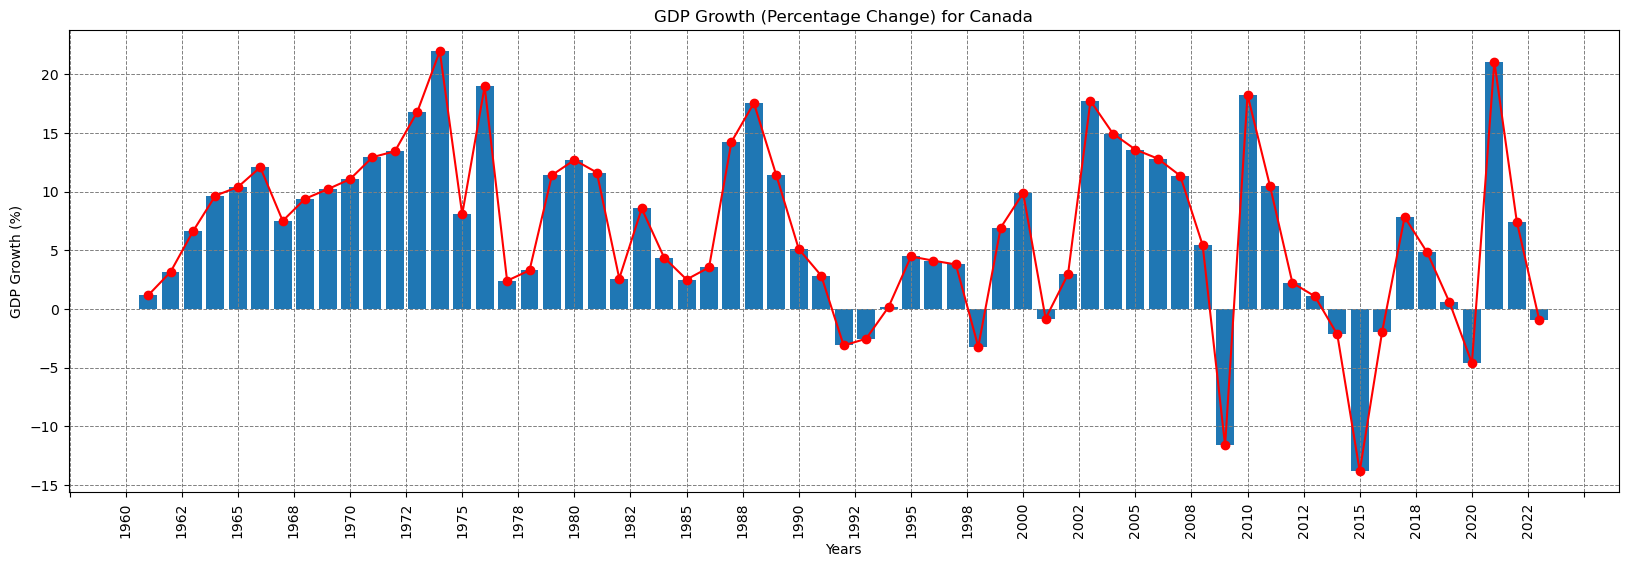

In [19]:
#Plotting the GDP growth percentage for a specific country, eg: Canada
plt.figure(figsize=(20, 6))
plt.plot(gdp_growth.T['Canada'], color='red', marker = 'o')
plt.bar(gdp_growth.T.index, gdp_growth.T['Canada'])
plt.grid(True, axis='both', linestyle='--', color='gray', linewidth=0.7)

plt.title('GDP Growth (Percentage Change) for Canada')
plt.xlabel('Years')
plt.ylabel('GDP Growth (%)')

# To decrease the number points in the x-axis from 174 to 30
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=30))  # Limit to 10 ticks
plt.xticks(rotation=90)
plt.show()

### Visualizing the GDP distribution across countries

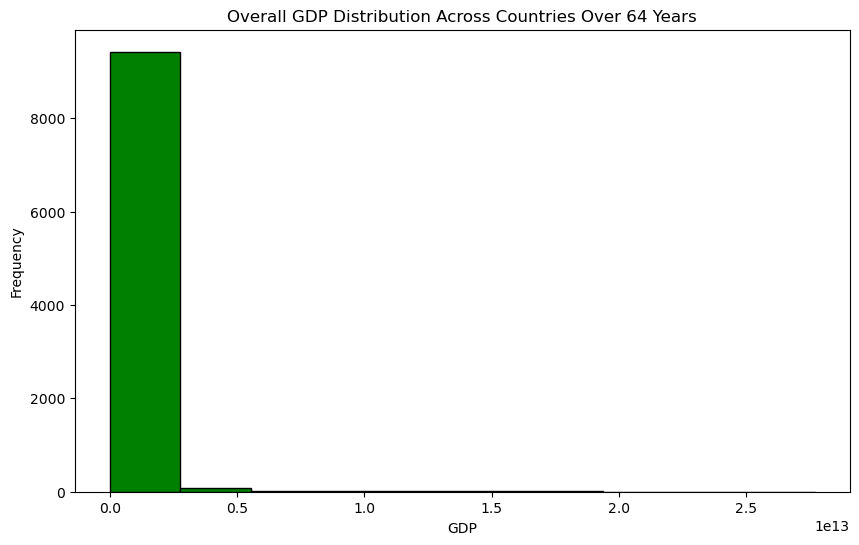

In [20]:
# Flatten the DataFrame to get all GDP values across all countries and years
gdp_values = filtered_countries_copy.values.flatten()

# Plot histogram for the GDP distribution across all countries and years
plt.figure(figsize=(10, 6))
plt.hist(gdp_values, color='green', edgecolor='black')
plt.title('Overall GDP Distribution Across Countries Over 64 Years')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

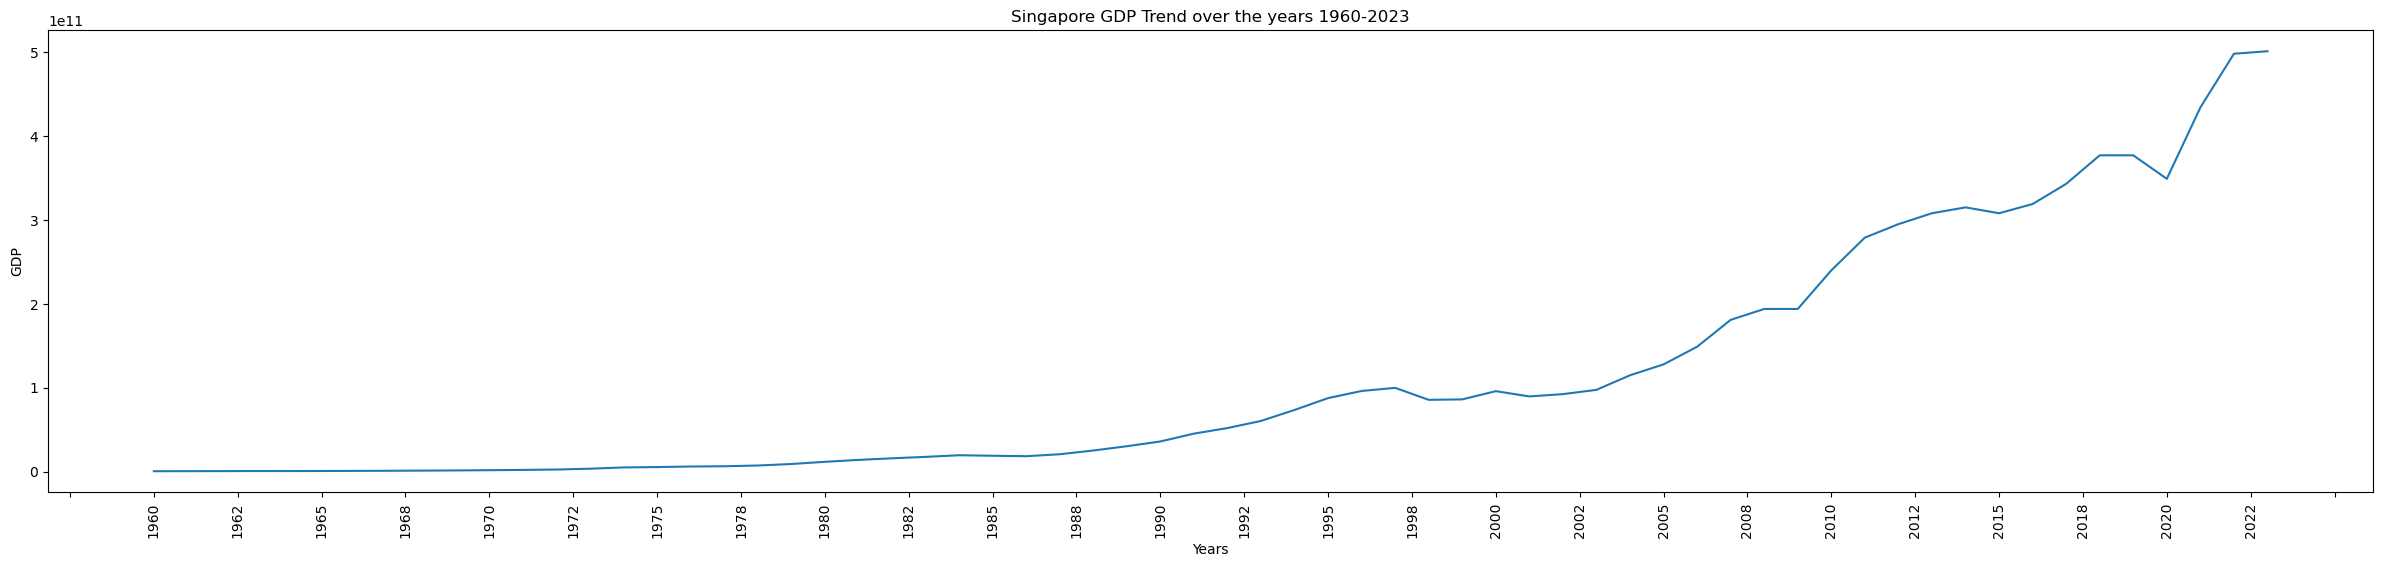

In [18]:
# Defining a function to access the gdp for each each year by calling the country name
def country_gdp(country):
    x = filtered_countries_copy.T[country]
    plt.figure(figsize = (30,6))
    plt.plot(x)
    plt.title('{} GDP Trend over the years 1960-2023'.format(country))
    plt.ylabel('GDP')
    plt.xlabel('Years')
    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=30))  # Limit to 10 ticks
    plt.xticks(rotation=90)    
    return x
x = country_gdp('Singapore')


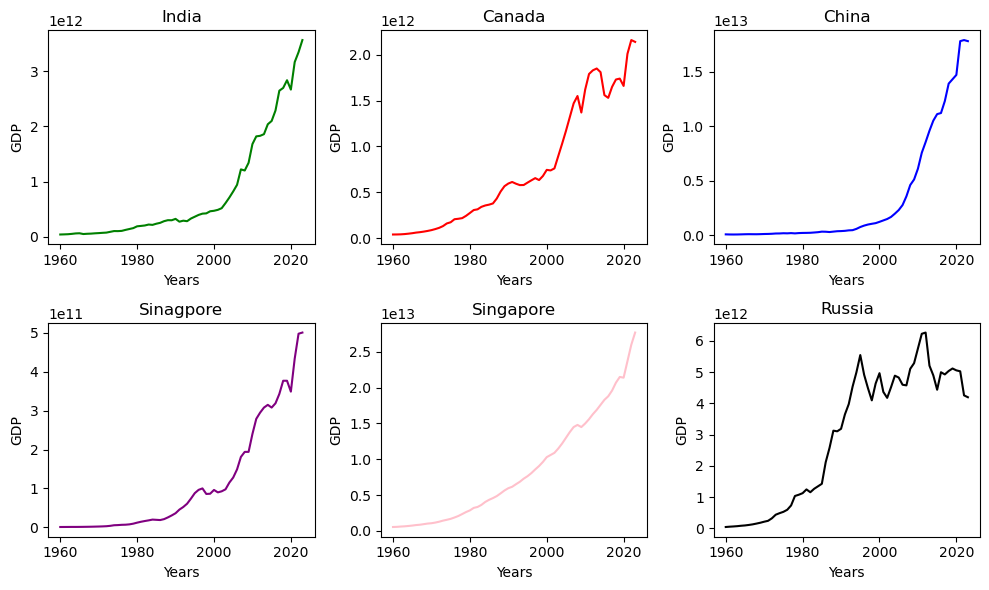

In [20]:
# Plotting GDP trend for few countries together
fig,axes = plt.subplots(2,3,figsize=(10,6))
filtered_countries_copy.T['India'].plot(ax=axes[0,0], title='India', color='green')
filtered_countries_copy.T['Canada'].plot(ax=axes[0,1], title='Canada', color='Red')
filtered_countries_copy.T['China'].plot(ax=axes[0,2], title='China', color='Blue')
filtered_countries_copy.T['Singapore'].plot(ax=axes[1,0], title='Sinagpore', color='purple')
filtered_countries_copy.T['United States'].plot(ax=axes[1,1], title='Singapore', color='pink')
filtered_countries_copy.T['Japan'].plot(ax=axes[1,2], title='Russia', color='black')


for ax in axes.flat:
    ax.set_xlabel('Years')
    ax.set_ylabel('GDP')


plt.tight_layout()


In [21]:
print("\nKey Findings:")
print("- Cleaned Data")
print("- Basic Stats for each country as per GDP")
print("- Total GDP for each year")
print("- Bar Plot - GDP Growth rate for each country")
print("- Histogram - Visualizing the GDP distribution across countries")
print("- Line Plot - Comparing GDP yearly trend for 6 countries")


Key Findings:
- Cleaned Data
- Basic Stats for each country as per GDP
- Total GDP for each year
- Bar Plot - GDP Growth rate for each country
- Histogram - Visualizing the GDP distribution across countries
- Line Plot - Comparing GDP yearly trend for 6 countries
